# Innovation Models for UAV technology

S Curve, BASS Diffusion Model, Pearl, Gompertz, and Logistic Model are exemplary models used in modeling the technology adoption process in technology management. 

In [1]:
import utils 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
uav_df = pd.read_csv('../data/processed/uav.csv')

uav_df

,title,cpc_i,asignee,filing_date,patent_no,relevancy,category
0,UNMANNED AERIAL VEHICLE,B64C27/08;B64C39/024;B64C27/16;B64U30/296;B64U...,Unknown,2018-12-27,20210214075,73.887054,Aviation
1,"LOGISTICS SYSTEM, UNMANNED AERIAL VEHICLE, AND...",B65G1/1373;B64C39/024;G05D1/104;B64D1/22;G06K7...,Unknown,2018-12-27,20220076192,64.447464,Aviation
2,"UNMANNED AERIAL VEHICLE CONTROL SYSTEM, UNMANN...",G08G5/045;B64F1/36;G05D1/0653;G08G5/0013;G08G5...,"Rakuten, Inc.",2018-12-25,20210209954,68.020300,Aviation
3,"SYSTEMS, METHODS, AND DEVICES FOR ITEM DELIVER...",G05D1/102;G06Q20/065;G06Q20/322;H04L9/3213;G06...,"Ford Global Technologies, LLC",2018-12-21,20200202284,63.734207,Aviation
4,SYSTEM FOR AUTONOMOUS UNMANNED AERIAL VEHICLE ...,B64C39/024;G08G5/045;G08G5/0052;G08G5/0043;G08...,Unknown,2018-12-20,20200202729,66.288730,Aviation
...,...,...,...,...,...,...,...
1301,Unmanned aerial vehicle,Unknown,"Aerovision Vehiculos Aeros, S.L.",2006-06-12,D573939,72.343630,Aviation
1302,Self-Contained Avionics Sensing And Flight Con...,G05D1/101,United States of America as represented by the...,2006-06-08,20070069083,62.483673,Aviation
1303,Relative navigation for aerial refueling of an...,G01S19/40;B64U80/25;G01S19/42;G05D1/104;B64D39...,Honeywell International Inc.,2006-05-15,20090326736,68.210840,Aviation
1304,METHOD AND SYSTEM FOR AUTONOMOUS TRACKING OF A...,G01S3/7864;G01S13/723;G05D1/0094,Honeywell International Inc.,2006-04-25,20070250260,64.014730,Aviation


Checking types of each feature

In [3]:
uav_df.dtypes

title           object
cpc_i           object
asignee         object
filing_date     object
patent_no       object
relevancy      float64
category        object
dtype: object

Convert `filing_date` column to datetime format

In [4]:
uav_df['filing_date'] = pd.to_datetime(uav_df['filing_date'])

Calculate the number of applications per `year`

In [5]:
applications_per_year = uav_df.groupby(uav_df['filing_date'].dt.year)['patent_no'].count()

Calculate the `cumulative count` of applications per year

In [6]:
cumulative_applications_per_year = applications_per_year.cumsum()

Create a new DataFrame to form S Curve

In [7]:
# Create a DataFrame from the Series
df = pd.DataFrame({
    'Year': applications_per_year.index,
    'Applications_Per_Year': applications_per_year.values,
    'Cumulative_Count': cumulative_applications_per_year.values
})

In [8]:
df

,Year,Applications_Per_Year,Cumulative_Count
0,2006,9,9
1,2007,12,21
2,2008,19,40
3,2009,15,55
4,2010,19,74
5,2011,18,92
6,2012,17,109
7,2013,25,134
8,2014,83,217
9,2015,166,383


Plotting S-curve for UAV patent applications

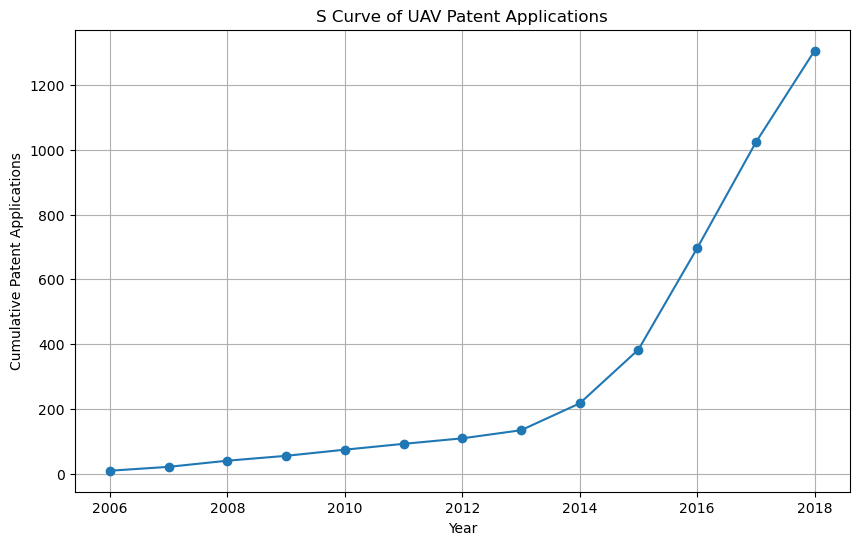

In [9]:

def plot_s_curve(data, year_col, count_col, title):
    """
    Plot the S-curve for cumulative count of patent applications over years.

    Parameters:
    - data: DataFrame containing the data
    - year_col: Name of the column containing the years
    - count_col: Name of the column containing the cumulative count
    - title: Title of the plot
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data[year_col], data[count_col], marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Cumulative Patent Applications')
    plt.grid(True)
    plt.show()

s_curve = plot_s_curve(df, 'Year', 'Cumulative_Count', 'S Curve of UAV Patent Applications')

s_curve

Plot the logistic curve

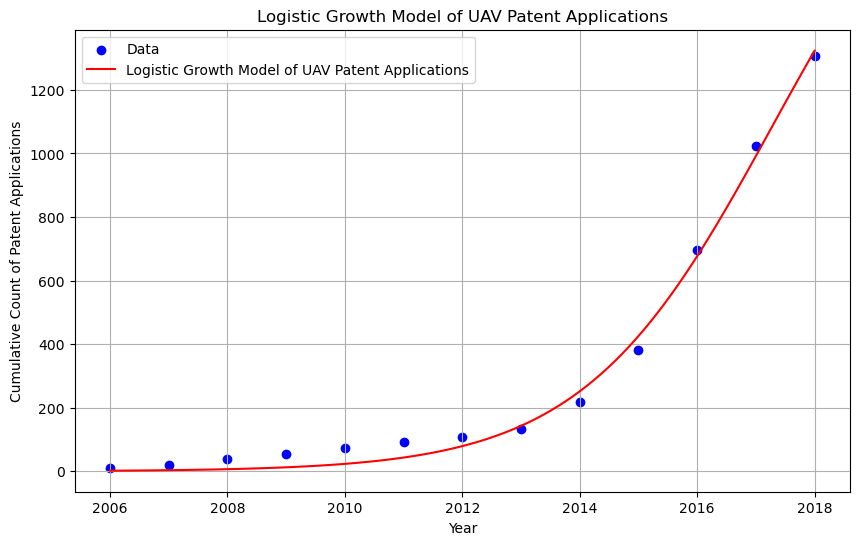

In [10]:
from scipy.optimize import curve_fit

def logistic_growth_function(t, L, k, t0):
    """
    Logistic growth function.

    Parameters:
    - t: Time variable
    - L: Carrying capacity
    - k: Growth rate
    - t0: Midpoint of growth

    Returns:
    - Value of the logistic growth function at time t
    """
    return L / (1 + np.exp(-k * (t - t0)))

def plot_model_curve(df, model_func, model_name):
    """
    Plot the model curve for the given DataFrame using the specified model function.

    Parameters:
    - df: DataFrame containing the data
    - model_func: Function representing the model
    - model_name: Name of the model for labeling the plot
    """
    # Provide initial guesses for the parameters
    initial_guess = [max(df['Cumulative_Count']), 0.1, np.median(df['Year'])]

    # Fit the model function to the cumulative count of patent applications per year
    popt, pcov = curve_fit(model_func, df['Year'], df['Cumulative_Count'], p0=initial_guess)

    # Generate points for the model curve
    x_values = np.linspace(min(df['Year']), max(df['Year']), 100)
    y_values = model_func(x_values, *popt)

    # Plot the model curve
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Year'], df['Cumulative_Count'], color='blue', label='Data')
    plt.plot(x_values, y_values, color='red', label=model_name)
    plt.title(model_name)
    plt.xlabel('Year')
    plt.ylabel('Cumulative Count of Patent Applications')
    plt.legend()
    plt.grid(True)
    plt.show()
    

# Plotting logistic growth model for UAV patent applications
plot_model_curve(df, utils.logistic_curve, 'Logistic Growth Model of UAV Patent Applications')